/Users/pavankunchala/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:59: RuntimeWarning: invalid value encountered in double_scalars


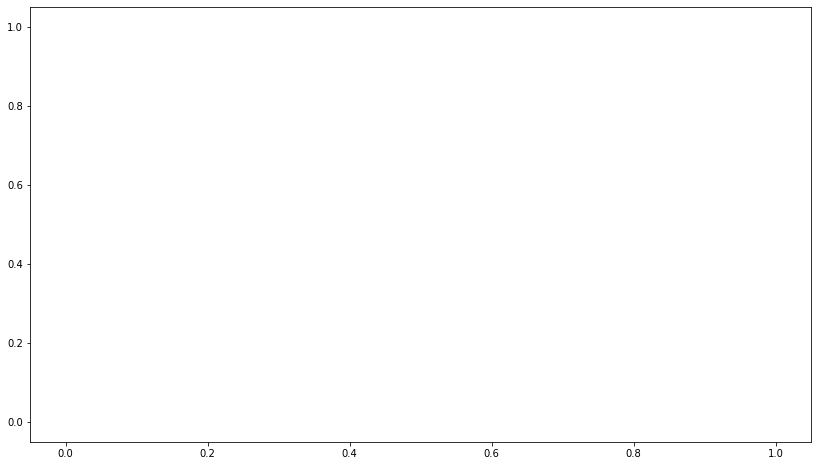

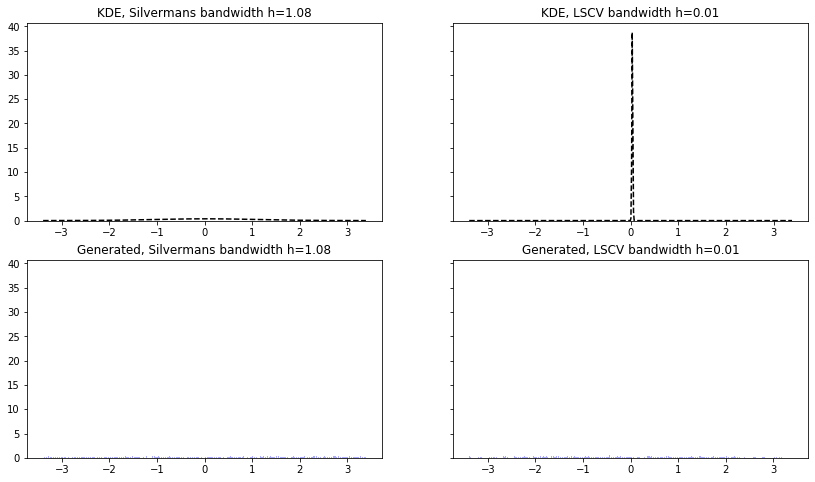

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#https://en.wikipedia.org/wiki/Gaussian_function
def gaussian(x,b=1):
    return np.exp(-x**2/(2*b**2))/(b*np.sqrt(2*np.pi))
    
#import data
#conists of one column of datapoints as 2.231, -0.1516, 1.564, etc
data=np.random.randn(1,1000)

N=500 #Number of bins
lenDataset = len(data)
#normalized histogram of loaded datase
hist, bins = np.histogram(data, bins=N, range=(np.min(data), np.max(data)), density=True)
width = 0.7 * (bins[1] - bins[0])
dx=(bins[1] - bins[0])
center = (bins[:-1] + bins[1:]) / 2

##Generate data
#There are few options here - save values of KDE for every small dx 
#OR save all the dataset and generate probability for every x we will test.
#We choose the second option here.

sumPdfSilverman=np.zeros(len(center))
#Silverman's Rule to find optimal bandwidth
#https://en.wikipedia.org/wiki/Kernel_density_estimation#Practical_estimation_of_the_bandwidth
h=1.06*np.std(data)*lenDataset**(-1/5.0)

for i in range(0, lenDataset):
    sumPdfSilverman+=((gaussian(center[:, None]-data[i],h))/lenDataset)[:,0]
    
#So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
i=0
generatedDataPdfSilverman=np.zeros(1000)
while i<1000:
    randNo=np.random.rand(1)*(np.max(data)-np.min(data))-np.absolute(np.min(data))
    if np.random.rand(1)<=np.sum((gaussian(randNo-data,h))/lenDataset):
        generatedDataPdfSilverman[i]=randNo
        i+=1

#Our second approach to calculate optimal bandwidth h using least-squares cross validation
#This looks a bit tricky, take a look at the theory explanation in the related article if you need to.
h_test = np.linspace(0.01, 1, 100) #h values to iterate for testing
L = np.zeros(len(h_test))
fhati = np.zeros(len(data)) #fhati
center
iteration=0
for h_iter in h_test:
    #find first part of equation
    for i in range(0, lenDataset):
        fhat = 0
        fhat+=((gaussian(center[:, None]-data[i],h_iter))/lenDataset)[:,0]
    
    #find second part of equation for sum fhati
    for i in range (0, lenDataset):
        mask=np.ones(lenDataset,dtype=bool)
        mask[i]=0
        fhati[i]=np.sum(gaussian(data[mask]-data[i],h_iter))/(lenDataset-1)
    
    L[iteration]=np.sum(fhat**2)*dx-2*np.mean(fhati)
    iteration=iteration+1

h2=h_test[np.argmin(L)]
#we can look how L looks like, depending on h
fig0, ax0 = plt.subplots(1,1, figsize=(14,8))
ax0.plot(h_test,L)
# fig0.savefig("Function_to_minimize[h,L_value].jpg")

#resulting PDF with found h2
sumPdfLSCV=np.zeros(len(center))
for i in range(0, lenDataset):
    sumPdfLSCV+=((gaussian(center[:, None]-data[i],h2))/lenDataset)[:,0]

#So here we have to sum 1000 gaussians at generated random x to evaluate probability that this x exists in new generated dataset.
i=0
generatedDataPdfCV=np.zeros(1000)
while i<1000:
    randNo=np.random.rand(1)*(np.max(data)-np.min(data))-np.absolute(np.min(data))
    if np.random.rand(1)<=np.sum((gaussian(randNo-data,h2))/lenDataset):
        generatedDataPdfCV[i]=randNo
        i+=1


##Plotting
fig, ax = plt.subplots(2,2, figsize=(14,8), sharey=True )
#Estimated PDF using Silverman's calculation for h
ax[0,0].plot(center, sumPdfSilverman, '-k', linestyle="dashed")
ax[0,0].set_title('KDE, Silvermans bandwidth h=%.2f' % h)

#Histogram for generated data using KDE and h found using Silverman's method
hist2, bins2 = np.histogram(generatedDataPdfSilverman, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,0].bar(center, hist2, align='center', width=width, fc='#AAAAFF')
ax[1,0].set_title('Generated, Silvermans bandwidth h=%.2f' % h)

#Estimated PDF using Least-squares cross-validation for h
ax[0,1].plot(center, sumPdfLSCV, '-k', linestyle="dashed")
ax[0,1].set_title('KDE, LSCV bandwidth h=%.2f' % h2)

#Histogram for generated data using KDE and h found using LSCV
hist3, bins3 = np.histogram(generatedDataPdfCV, bins=N, range=(np.min(data), np.max(data)), density=True)
ax[1,1].bar(center, hist3, align='center', width=width, fc='#AAAAFF')
ax[1,1].set_title('Generated, LSCV bandwidth h=%.2f' % h2)

#note that PDF found using KDE does not sum up exactly to one, because we ignore the side-spread
#values produced by KDE
# fig.savefig("Many_Points_Example_KDE.jpg")

In [2]:
def generateData(mu,sigma ,no,count):
    if no == 1:
        sample = np.random.normal(mu,sigma,count)
        return sample
    if no ==2:
        sample1, sample2 = np.random.multivariate_normal(mu,sigma,count).T
        return sample1,sample2
        